# CF 6.2 Exploring Relationships

## Questions I will be examining
- Are highest priced items more likely to be returned
- What is the distribution of values stolen
- Are certain items more likely to be stolen

In [12]:
#import the data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os


## Notes: 
- The data was edited before this task
- I added in 1 | 0 values to breakout categories for analysis.
- I identified and removed 2 outliers where there was an item with a 1 stolen value but 75000 recovery value

In [6]:
#reset as I have worked on the notebook several times and I want to make sure python treats this project as new
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [14]:
#name the path
path = r'C:\Users\laura\Documents\Continuting Education\Career Foundry\Advanced Analytics and Dashboards\Data Analytics Dashboard Project'

In [16]:
#import the data file
df_cargo_3 = pd.read_csv(os.path.join(path, 'Data Files', 'edited', 'CD_2023_Cleaned_3.csv'))

In [18]:
df_cargo_3.head()

,Unnamed: 0.1,Unnamed: 0,data_year,ori,pub_agency_name,pub_agency_unit,agency_type_name,city_name,state_abbr,state_name,...,is_public_victim,is_prop_desc_other,is_prop_desc_purse,is_prop_desc_money,is_prop_desc_auto,is_prop_desc_tools,is_location_home,is_location_parking_lot,is_location_highway,is_perp_male
0,0,0,2019,NC0900200,Monroe,NaN,City,Monroe,NC,North Carolina,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2012,FL0530000,Polk,NaN,County,NaN,FL,Florida,...,0,0,0,0,0,0,0,0,0,0
2,2,2,2012,FL0530000,Polk,NaN,County,NaN,FL,Florida,...,0,0,0,0,0,0,0,0,0,0
3,3,11,2012,SC0150000,Colleton,NaN,County,NaN,SC,South Carolina,...,0,0,0,0,0,0,0,1,0,0
4,4,12,2020,FL0139700,Miami Gardens,NaN,City,Miami Gardens,FL,Florida,...,0,0,0,0,0,0,0,0,1,0


In [20]:
#check MatLab Version
matplotlib.__version__

'3.10.0'

In [22]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [25]:
list(df_cargo_3.columns)

['Unnamed: 0.1',
 'Unnamed: 0',
 'data_year',
 'ori',
 'pub_agency_name',
 'pub_agency_unit',
 'agency_type_name',
 'city_name',
 'state_abbr',
 'state_name',
 'division_name',
 'county_name',
 'county_name_2',
 'county_name_3',
 'county_name_4',
 'region_name',
 'population_group_desc',
 'offense_name',
 'offender_race',
 'offender_ethnicity',
 'offender_age',
 'offender_sex',
 'victim_type_name',
 'location_name',
 'weapon_name',
 'prop_desc_name',
 'stolen_value',
 'recovered_value',
 'recovered_flag',
 'date_recovered',
 'is_city',
 'is_county',
 'is_federal',
 'is_college',
 'is_florida',
 'is_recovered',
 'is_indv_victim',
 'is_biz_victim',
 'is_public_victim',
 'is_prop_desc_other',
 'is_prop_desc_purse',
 'is_prop_desc_money',
 'is_prop_desc_auto',
 'is_prop_desc_tools',
 'is_location_home',
 'is_location_parking_lot',
 'is_location_highway',
 'is_perp_male']

In [27]:
#create a new data frame with just the columns I need
#This will example location stolen
correlation_geo_df = df_cargo_3[['stolen_value', 'recovered_value', 'is_recovered', 'is_city', 'is_county', 'is_federal', 'is_college']]

In [29]:
correlation_geo_df.head()

,stolen_value,recovered_value,is_recovered,is_city,is_county,is_federal,is_college
0,50,0,0,1,0,0,0
1,120000,0,0,0,1,0,0
2,120000,0,0,0,1,0,0
3,2000,0,0,0,1,0,0
4,663,0,0,1,0,0,0


## Create a correlation matrix

In [32]:
correlation_geo_df.corr()

,stolen_value,recovered_value,is_recovered,is_city,is_county,is_federal,is_college
stolen_value,1.000000,0.086726,0.001296,0.000986,-0.000862,0.000241,-0.000477
recovered_value,0.086726,1.000000,0.024996,0.000702,-0.001127,0.003254,-0.000907
is_recovered,0.001296,0.024996,1.000000,0.017983,-0.020217,-0.020775,-0.015865
is_city,0.000986,0.000702,0.017983,1.000000,-0.927843,-0.080020,-0.136560
is_county,-0.000862,-0.001127,-0.020217,-0.927843,1.000000,-0.033636,-0.057403
is_federal,0.000241,0.003254,-0.020775,-0.080020,-0.033636,1.000000,-0.004951
is_college,-0.000477,-0.000907,-0.015865,-0.136560,-0.057403,-0.004951,1.000000


In [34]:
#This will example the property type
correlation_property_df = df_cargo_3[[ 'stolen_value', 'recovered_value','is_recovered', 'is_prop_desc_auto', 'is_prop_desc_other', 'is_prop_desc_purse', 'is_prop_desc_money', 'is_prop_desc_tools']]

In [36]:
correlation_property_df.corr()

,stolen_value,recovered_value,is_recovered,is_prop_desc_auto,is_prop_desc_other,is_prop_desc_purse,is_prop_desc_money,is_prop_desc_tools
stolen_value,1.000000,0.086726,0.001296,0.001324,-0.002180,-0.001678,0.007325,-0.001502
recovered_value,0.086726,1.000000,0.024996,0.015238,-0.003070,-0.002593,-0.003890,-0.002481
is_recovered,0.001296,0.024996,1.000000,0.306205,-0.048036,-0.045403,-0.124531,-0.036800
is_prop_desc_auto,0.001324,0.015238,0.306205,1.000000,-0.130860,-0.069539,-0.105887,-0.076174
is_prop_desc_other,-0.002180,-0.003070,-0.048036,-0.130860,1.000000,-0.106393,-0.162004,-0.116544
is_prop_desc_purse,-0.001678,-0.002593,-0.045403,-0.069539,-0.106393,1.000000,-0.086089,-0.061931
is_prop_desc_money,0.007325,-0.003890,-0.124531,-0.105887,-0.162004,-0.086089,1.000000,-0.094303
is_prop_desc_tools,-0.001502,-0.002481,-0.036800,-0.076174,-0.116544,-0.061931,-0.094303,1.000000


## based on the correlations I will examine property type further

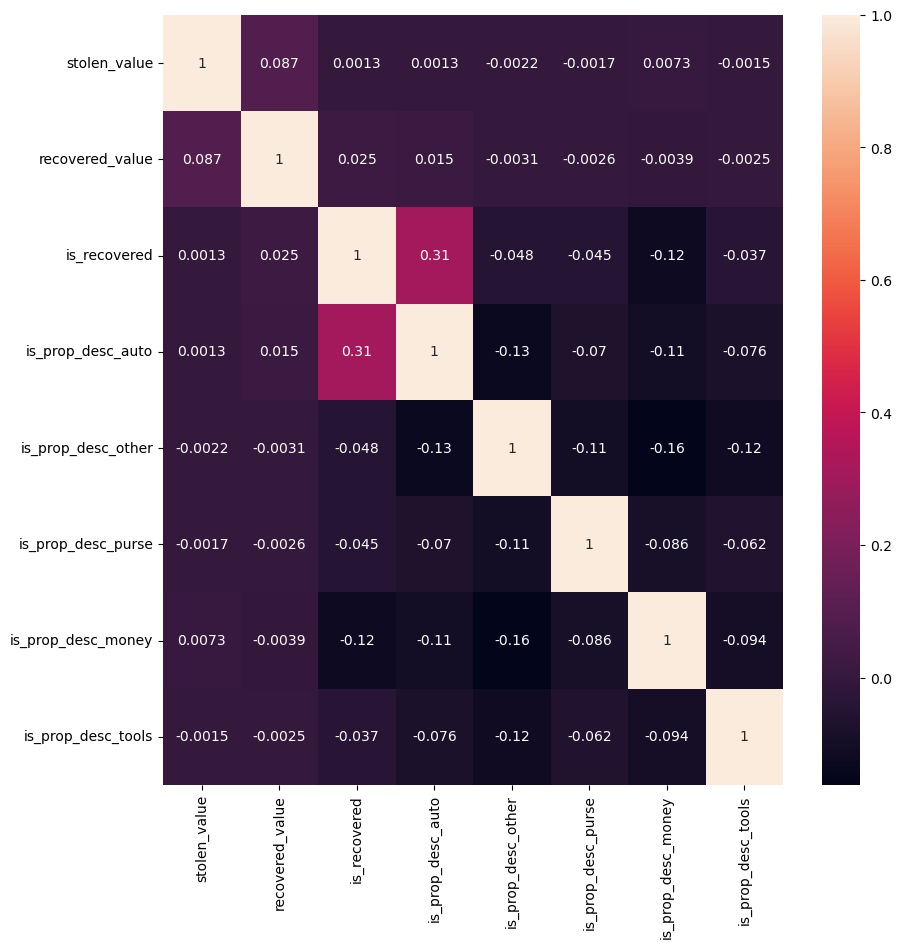

In [39]:
# Create a correlation heatmap using matplotlib
# correlation_property_df

# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(correlation_property_df.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.
plt.show()

In [41]:
# With the exception of is recovered and auto the rest of the variables have very weak correlations

In [43]:
# create a scatter plot
#For this, I will use the  stole value and recovered value since these are the only numberical variables available
sns.lmplot(x = 'stolen_value', y = 'recovered_value', data = df_cargo_3)

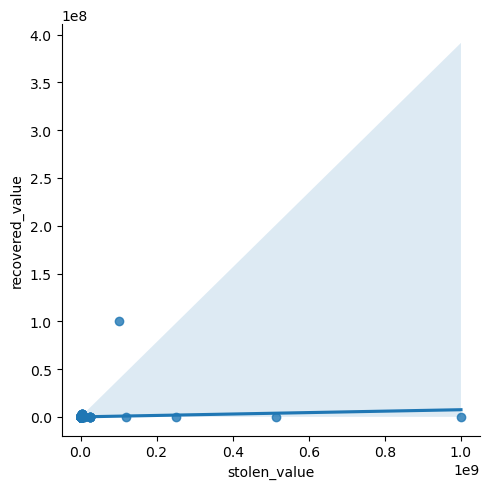

In [45]:
plt.show()

In [35]:
#This does indeed show a low correlation.
# However I suspect there are several values clustered at the low end of the chart, and it may be better to segment the data for further analysis.
(df_cargo_3['stolen_value'].describe())

count    1.901480e+05
mean     1.918857e+04
std      2.670175e+06
min      1.000000e+00
25%      5.000000e+01
50%      3.410000e+02
75%      1.800000e+03
max      1.000000e+09
Name: stolen_value, dtype: float64

In [89]:
stolen_value_filter_df = df_cargo_3[df_cargo_3['stolen_value'] <= 1800]
#filter for bottom 75%

In [53]:
stolen_value_filter_df.head()

,Unnamed: 0.1,Unnamed: 0,data_year,ori,pub_agency_name,pub_agency_unit,agency_type_name,city_name,state_abbr,state_name,...,is_public_victim,is_prop_desc_other,is_prop_desc_purse,is_prop_desc_money,is_prop_desc_auto,is_prop_desc_tools,is_location_home,is_location_parking_lot,is_location_highway,is_perp_male
0,0,0,2019,NC0900200,Monroe,NaN,City,Monroe,NC,North Carolina,...,0,0,0,0,0,0,0,0,0,0
4,4,12,2020,FL0139700,Miami Gardens,NaN,City,Miami Gardens,FL,Florida,...,0,0,0,0,0,0,0,0,1,0
5,5,13,2016,TXSPD0000,San Antonio,NaN,City,San Antonio,TX,Texas,...,0,0,0,0,0,0,0,1,0,0
6,6,14,2016,TNMPD0000,Memphis,NaN,City,Memphis,TN,Tennessee,...,0,0,0,0,0,0,0,0,0,1
7,7,15,2016,TNMPD0000,Memphis,NaN,City,Memphis,TN,Tennessee,...,0,0,0,0,0,0,0,0,0,0


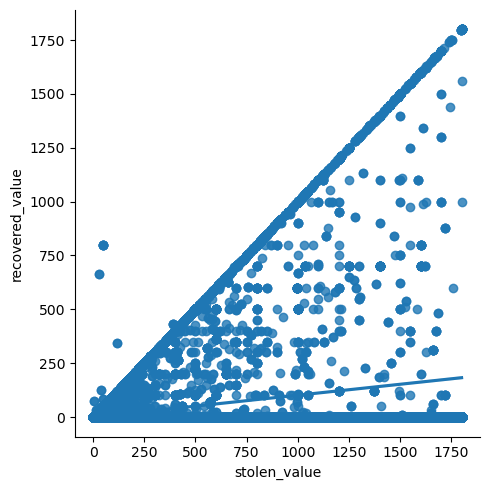

In [55]:
# create a scatter plot
#For this, I will use the  stolen value and recovered value since these are the only numberical variables available
sns.lmplot(x = 'stolen_value', y = 'recovered_value', data = stolen_value_filter_df)
plt.show()

In [57]:
#Here the data and trend is a little clearer. There is a correlation between stolen and recovered value, but it is only moderate


In [59]:
#running the correlation again
correlation_property_df_filtered = stolen_value_filter_df[[ 'stolen_value', 'recovered_value','is_recovered', 'is_prop_desc_auto', 'is_prop_desc_other', 'is_prop_desc_purse', 'is_prop_desc_money', 'is_prop_desc_tools']]

In [49]:
correlation_property_df_filtered.corr()

,stolen_value,recovered_value,is_recovered,is_prop_desc_auto,is_prop_desc_other,is_prop_desc_purse,is_prop_desc_money,is_prop_desc_tools
stolen_value,1.000000,0.126874,-0.019351,-0.005587,-0.076815,-0.124483,-0.026824,0.114161
recovered_value,0.126874,1.000000,0.282117,0.079056,-0.019986,-0.020254,-0.034215,0.007885
is_recovered,-0.019351,0.282117,1.000000,0.187956,-0.007750,-0.024567,-0.102509,-0.007754
is_prop_desc_auto,-0.005587,0.079056,0.187956,1.000000,-0.083880,-0.047399,-0.067092,-0.044177
is_prop_desc_other,-0.076815,-0.019986,-0.007750,-0.083880,1.000000,-0.130661,-0.184948,-0.121779
is_prop_desc_purse,-0.124483,-0.020254,-0.024567,-0.047399,-0.130661,1.000000,-0.104511,-0.068815
is_prop_desc_money,-0.026824,-0.034215,-0.102509,-0.067092,-0.184948,-0.104511,1.000000,-0.097406
is_prop_desc_tools,0.114161,0.007885,-0.007754,-0.044177,-0.121779,-0.068815,-0.097406,1.000000


In [61]:
#recoverd value has moved to .08 to .12 a slightly increased correlation.
#Interestingly is recovered auto decreased to .18. This does give some indication that recovery may be linked to value for some items
#also is_recovered and recovered_value has increased from .02 to .28
#again I think this indicates a third factor is at play that influencing the chance of being recovered and the recovered value

## Create a pair plot of the data set

In [64]:
property_plot_pair = correlation_property_df[['recovered_value', 'is_recovered', 'is_prop_desc_auto']]
#seaborn is having a very difficult time displaying stolen and recovered value. 
#I may need to analyze this using Tableau later


In [66]:
property_plot_pair_sample  = property_plot_pair.sample(frac=0.1)

In [68]:
property_plot_pair_sample.shape

(19015, 3)

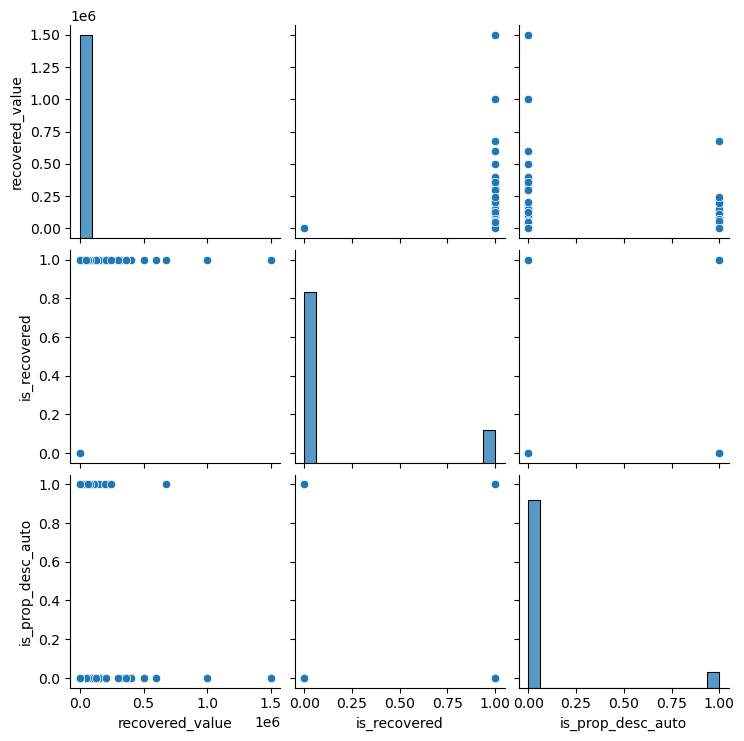

In [70]:
g = sns.pairplot(property_plot_pair_sample)
plt.show()

In [72]:
#due to data limitations very little data is displayed. The plot pair shows the breakout if something was recovered, and the recovered value is higher if it is/

##  Categorical Plots

In [75]:
#filtering for value not 0. That is skewing the results
#Also, filtering for outliers that skew the data
stolen_value_plot_df = df_cargo_3[(df_cargo_3['stolen_value'] > 5) & (df_cargo_3['stolen_value'] < 50000)]


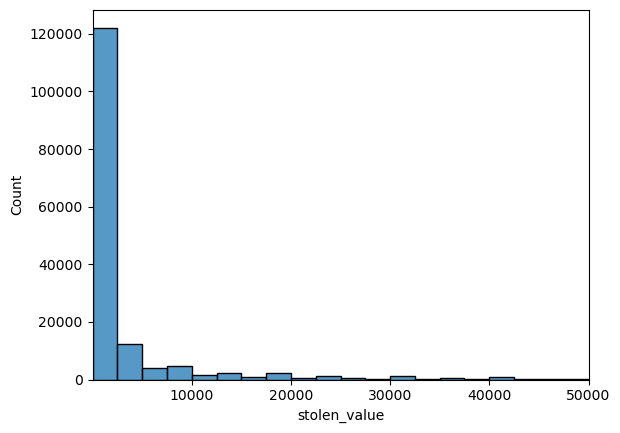

In [77]:
sns.histplot(stolen_value_plot_df['stolen_value'], bins = 20)
plt.xlim(5, 50000)
plt.show()

In [79]:
#it is clear the data is skewed towards the bottom even without filtering
#I'll run this again for values under 1000 to get more info

In [81]:
#filtering for value not 0. That is skewing the results
#Also, filtering for outliers that skew the data
stolen_value_plot_df_1000 = df_cargo_3[(df_cargo_3['stolen_value'] > 5) & (df_cargo_3['stolen_value'] < 1000)]


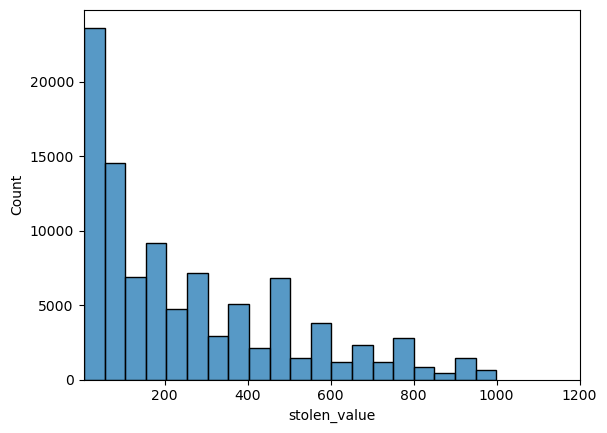

In [83]:
sns.histplot(stolen_value_plot_df_1000['stolen_value'], bins = 20)
plt.xlim(5, 1200)
plt.show()

In [85]:
#This still shows a skwed distribution but with more nuance.

## Answers to initial questions
- Are highest priced items more likely to be returned? Answer: Slightly more likely. There was only a very small positive correlation between stolen and returned amount. This figure may differ based on price and product as automobiles were less likely to be returned when they were filtered for under 1800
- What is the distribution of values stolen: Answer thisis skewed heavily towards low values that are close to 0
Are certain items more likely to be stolen from a given location
- Are certain items more likely to be stolen: Answer stolen value by item type did not have a positive correlation.

## Define a hypothesis
- If an item was recoverd it is likely to have a higher value
- To prove this I will need to filter for only items that were returned and analyze the data by return type.